Recall the data from Part 1 of this lab. Read it in.

In [1]:
import urllib
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
urllib.urlretrieve (data_url, "housing.data")

names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

import pandas as pd
data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

In [2]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Exercise 1: Find the mean, standard deviation, and the standard error of the mean for variable 'AGE.'

In [3]:
import numpy as np

print "The mean is " + str(np.mean(data['AGE'])) + "."
print "The standard deviation is " + str(np.std(data['AGE'])) + "."
print "The standard error of the mean is " + str(np.std(data['AGE'],ddof = 1)/(len(data['AGE']))**0.5) + "."

The mean is 68.5749011858.
The standard deviation is 28.1210325702.
The standard error of the mean is 1.25136952526.


Exercise 2: Generate a 90%, 95%, and 99% confidence interval for 'AGE'. Do at least one of these manually (i.e. by plugging in the appropriate parts) and at least one of these using a function from scipy.stats. Interpret the results from all three confidence intervals.

In [4]:
from scipy.stats import t

t_interval_90 = t.interval(0.9,
                           len(data['AGE'])-1,
                           loc=np.mean(data['AGE']),
                           scale=np.std(data['AGE'],ddof = 1)/(len(data['AGE']))**0.5)

print "We are 90% confident that the true mean value for 'AGE' is between " + str(t_interval_90[0]) + " and " + str(t_interval_90[1]) + " years of age."

t_interval_95 = t.interval(0.95,
                           len(data['AGE'])-1,
                           loc=np.mean(data['AGE']),
                           scale=np.std(data['AGE'],ddof = 1)/(len(data['AGE']))**0.5)

print "We are 95% confident that the true mean value for 'AGE' is between " + str(t_interval_95[0]) + " and " + str(t_interval_95[1]) + " years of age."

We are 90% confident that the true mean value for 'AGE' is between 66.512798667 and 70.6370037045 years of age.
We are 95% confident that the true mean value for 'AGE' is between 66.1163697185 and 71.033432653 years of age.


In [5]:
## Recall that a 99% t confidence interval will be of the form
## (x-bar - t * s/sqrt(n), x-bar + t * s/sqrt(n))
## where t is the critical t-value with 506 degrees of freedom
## and for 99% confidence.

critical_t = t.ppf(0.995,506) # This pulls the critical value for 99.5%, which is appropriate.

Exercise 3: Did you rely on the Central Limit Theorem in Exercise 2? Why or why not?

(array([  14.,   31.,   29.,   42.,   32.,   38.,   39.,   42.,   71.,  168.]),
 array([   2.9 ,   12.61,   22.32,   32.03,   41.74,   51.45,   61.16,
          70.87,   80.58,   90.29,  100.  ]),
 <a list of 10 Patch objects>)

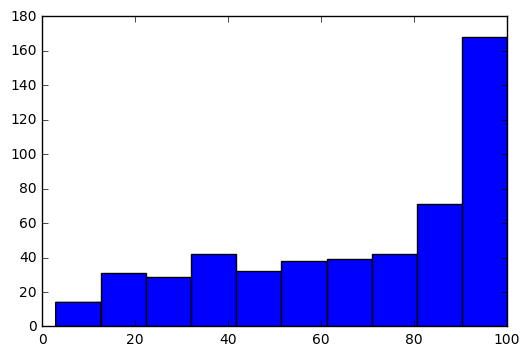

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(data['AGE'])

# Yes. We don't know whether or not 'AGE' is Normally distributed (and by the
# plot below, it clearly is not), but since the size of our sample n is larger
# than 30, we know that the behavior of X-bar will be Normal enough for us
# to use our t-distribution to generate our confidence intervals.

Exercise 4: For variable 'NOX', generate a 95% confidence interval and interpret it.

In [7]:
t_interval_95 = t.interval(0.95,
                           len(data['NOX'])-1,
                           loc=np.mean(data['NOX']),
                           scale=np.std(data['NOX'],ddof = 1)/(len(data['NOX']))**0.5)

print "We are 95% confident that the true mean value for 'NOX' is between " + str(t_interval_95[0]) + " and " + str(t_interval_95[1]) + "."

We are 95% confident that the true mean value for 'NOX' is between 0.544574262292 and 0.564815856285.


Exercise 5: For the variable 'NOX', find the median.

In [8]:
np.median(data['NOX'])

0.53800000000000003

Exercise 6: For the variable 'NOX', test the hypothesis that the mean is equal to the median. You may use scipy functions to complete this, but complete all steps - define hypotheses, etc. Let alpha = 0.05. Interpret your results.

In [9]:
## Step 1: Define hypotheses.
### H_0: mu_NOX = M_NOX
### H_A: mu_NOX != M_NOX

## Step 2: alpha = 0.05.
alpha = 0.05

## Step 3: Calculate point estimate.
sample_mean = np.mean(data['NOX'])

## Step 4: Calculate test statistic.
t_statistic = (sample_mean - np.median(data['NOX']))/(np.std(data['NOX'], ddof=1)/len(data['NOX'])**0.5)

## Step 5: Find p-value.
p_value = t.sf(np.abs(t_statistic), len(data['NOX'])) * 2 
## Because our alternative hypothesis is != (rather than greater than or less than),
## we multiply our p-value by 2. (This is called a two-sided test.)

print "Our sample mean is " + str(sample_mean) + "."
print "Our t-statistic is " + str(t_statistic) + "."
print "Our p-value is " + str(p_value) + "."

if p_value < alpha:
    print "We reject our null hypothesis and conclude that the true mean NOX value is different from the median NOX value."
elif p_value > alpha:
    print "We fail to reject our null hypothesis and cannot conclude that the true mean NOX value is different from the median ."
else:
    print "Our test is inconclusive."

Our sample mean is 0.554695059289.
Our t-statistic is 3.24088371678.
Our p-value is 0.00127005273618.
We reject our null hypothesis and conclude that the true mean NOX value is different from the median NOX value.


Exercise 7: What do you notice about the results from Exercise 4 and Exercise 6? If you were going to generalize this to the relationship between hypothesis tests and confidence intervals, what might you say? Be specific.

In [10]:
## When we calculated the median, it was 0.538. The 95% confidence interval for our
## mean contained 0.545 through 0.565. Since the median was outside our 95%
## confidence interval, this suggests that the true mean would not be equal to our
## median.

## We then conducted the hypothesis test and found that, at the alpha = 0.05
## significance level, we rejected the hypothesis that the mean and median were
## equal.

## The results of our hypothesis test and confidence interval are in agreement
## here. Because our significance level (for HT) is alpha, as long as our 
## confidence level (for CI) is 1 - alpha, the results should be in agreement.
## That is, if the value of interest does not lie in our 1 - alpha CI, then
## testing the hypothesis that the parameter equals the value of interest
## should be rejected at the alpha significance level. Similarly, if the value
## of interest *does* lie in our 1 - alpha CI, then testing the hypothesis that
## the parameter equals the value of interest should *not* be rejected at the
## alpha significance level.

Exercise 8: For the variable 'NOX', test the hypothesis that the mean is greater than or equal to the median. You may use scipy functions to complete this, but complete all steps - define hypotheses, etc. Let alpha = 0.05. Interpret your results.

In [11]:
## Step 1: Define hypotheses.
### H_0: mu_NOX >= M_NOX
### H_A: mu_NOX < M_NOX

## Step 2: alpha = 0.05.
alpha = 0.05

## Step 3: Calculate point estimate.
sample_mean = np.mean(data['NOX'])

## Step 4: Calculate test statistic.
t_statistic = (sample_mean - np.median(data['NOX']))/(np.std(data['NOX'], ddof=1)/len(data['NOX'])**0.5)

## Step 5: Find p-value.
p_value = t.sf(np.abs(t_statistic), len(data['NOX']))
## Because our alternative hypothesis is < (rather than equal to),
## we DO NOT multiply our p-value by 2. (This is called a one-sided test.)

print "Our sample mean is " + str(sample_mean) + "."
print "Our t-statistic is " + str(t_statistic) + "."
print "Our p-value is " + str(p_value) + "."

if p_value < alpha:
    print "We reject our null hypothesis and conclude that the true mean NOX value is different from the median NOX value."
elif p_value > alpha:
    print "We fail to reject our null hypothesis and cannot conclude that the true mean NOX value is different from the median ."
else:
    print "Our test is inconclusive."

Our sample mean is 0.554695059289.
Our t-statistic is 3.24088371678.
Our p-value is 0.00063502636809.
We reject our null hypothesis and conclude that the true mean NOX value is different from the median NOX value.


Exercise 9: Compare the p-values from Exercise 6 and Exercise 8. What do you notice?

In [12]:
## The p-value in Exercise 6 is exactly double the p-value in Exercise 8, by construction.
## This is because of the fact that our alternative hypotheses are different. In Exercise
## 6, we can reject the null hypothesis for very large values of mu or very small values
## of mu. Because this is a two-sided test, we double our p-value. In Exercise 8, we can
## reject the null hypothesis for very small values of mu *but* cannot reject the null
## hypothesis for very large values of mu. Because we can only reject on one side, we
## call this a one-sided test. Due to the fact that this is a one-sided test, we do not
## need to double our p-value.